In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv('spam.csv')
data = data[data.columns[1:]]
data.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


In [4]:
data.columns

Index(['make', 'address', 'all', 'num3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', 'num000',
       'money', 'hp', 'hpl', 'george', 'num650', 'lab', 'labs', 'telnet',
       'num857', 'data', 'num415', 'num85', 'technology', 'num1999', 'parts',
       'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu',
       'table', 'conference', 'charSemicolon', 'charRoundbracket',
       'charSquarebracket', 'charExclamation', 'charDollar', 'charHash',
       'capitalAve', 'capitalLong', 'capitalTotal', 'type'],
      dtype='object')

In [5]:
spam = data[data["type"] == "spam"]
nonspam = data[data["type"] == "nonspam"]

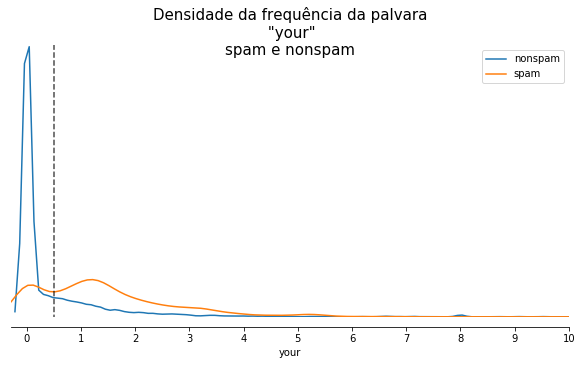

In [6]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.set_xlim(-.3, 10)
ax.set_ylim(0, 3)
ax.set_yticks([])
ax.set_xticks(range(0, 11))

plt.title("Densidade da frequência da palvara\n \"your\"\nspam e nonspam", fontsize=15, pad=-10)

sns.distplot(nonspam['your'], hist = False, label="nonspam")
sns.distplot(spam['your'], hist = False, label="spam")
plt.plot([.5, .5], [-.3, 3], "--", color="black", alpha = 0.7)

sns.despine(offset=10, left=True)

plt.show()

In [7]:
spam = data[data["type"] == "spam"]
nonspam = data[data["type"] == "nonspam"]
print(len(spam.type)/len(data.type))
print(len(nonspam.type)/len(data.type))

0.39404477287546186
0.6059552271245382


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns.values[:-1]], data[data.columns.values[-1:]], test_size=0.3, stratify=data[data.columns.values[-1:]])

Verificando se as propoções permanacem iguais.

In [9]:
train_spam = y_train[y_train["type"] == "spam"]
train_nonspam = y_train[y_train["type"] == "nonspam"]
print(len(train_spam.type)/len(y_train.type))
print(len(train_nonspam.type)/len(y_train.type))

0.3940993788819876
0.6059006211180125


In [10]:
X_train.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,conference,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal
211,0.00,0.00,0.00,0.0,0.0,0.00,1.04,0.0,0.0,0.00,...,0.00,0.0,0.000,0.000,0.000,0.0,0.0,3.812,11,61
1911,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,...,0.48,0.0,0.371,0.074,0.074,0.0,0.0,2.534,18,185
3201,0.26,0.00,0.53,0.0,0.0,0.26,0.00,0.0,0.0,0.00,...,0.00,0.0,0.039,0.000,0.000,0.0,0.0,2.646,77,172
4007,0.00,0.00,0.66,0.0,0.0,0.00,0.00,0.0,0.0,0.33,...,0.00,0.0,0.282,0.000,0.000,0.0,0.0,2.238,13,188
2421,0.31,0.31,0.94,0.0,0.0,0.62,0.00,0.0,0.0,0.00,...,0.00,0.0,0.000,0.000,0.096,0.0,0.0,2.368,45,180


In [11]:
X_test.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,conference,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal
2637,0.0,0.00,0.62,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.084,0.0,0.169,0.000,0.000,1.863,10,82
314,0.0,0.11,0.23,0.0,0.58,0.34,0.11,0.00,0.34,0.0,...,0.0,0.075,0.037,0.0,0.322,0.094,0.018,2.576,48,389
38,0.0,0.48,0.48,0.0,0.48,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.080,0.0,0.963,0.000,0.000,3.100,61,186
4406,0.0,0.00,0.23,0.0,0.00,0.23,0.00,0.00,0.00,0.0,...,0.0,0.000,0.064,0.0,0.161,0.000,0.000,1.065,7,146
995,0.0,0.41,0.41,0.0,2.06,0.00,1.65,0.82,0.00,0.0,...,0.0,0.000,0.265,0.0,0.199,0.000,0.000,15.892,226,445


In [12]:
y_train.head()

,type
211,spam
1911,nonspam
3201,nonspam
4007,nonspam
2421,nonspam


In [13]:
y_test.head()

,type
2637,nonspam
314,spam
38,spam
4406,nonspam
995,spam


In [14]:
pred = []
for i in range(0,len(data)):
    if data["your"][i] < 0.5:
        pred.append("nonspam")
    else:
        pred.append("spam")

In [15]:
confusion_matrix(data["type"], pred)/len(data)

array([[0.45772658, 0.14822865],
       [0.10106499, 0.29297979]])

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [17]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

g:\program files (x86)\phyton 3.7.1\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
g:\program files (x86)\phyton 3.7.1\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9123823316437364

In [18]:
X_train, X_test, y_train, y_test

(      make  address   all  num3d   our  over  remove  internet  order  mail  \
 211   0.00     0.00  0.00    0.0  0.00  0.00    1.04      0.00   0.00  0.00   
 1911  0.00     0.00  0.00    0.0  0.00  0.00    0.00      0.00   0.00  0.00   
 3201  0.26     0.00  0.53    0.0  0.00  0.26    0.00      0.00   0.00  0.00   
 4007  0.00     0.00  0.66    0.0  0.00  0.00    0.00      0.00   0.00  0.33   
 2421  0.31     0.31  0.94    0.0  0.00  0.62    0.00      0.00   0.00  0.00   
 1941  0.00     0.00  0.00    0.0  0.00  0.00    0.00      0.00   0.00  0.00   
 997   0.00     0.41  0.41    0.0  2.06  0.00    1.65      0.82   0.00  0.00   
 2807  0.00     0.00  0.00    0.0  0.00  0.00    0.00      0.00   0.00  0.00   
 4248  0.00     0.00  0.00    0.0  0.00  0.61    0.00      0.00   0.00  0.00   
 2728  0.00     0.00  0.00    0.0  0.00  0.00    0.00      0.00   0.00  0.00   
 3160  0.00     0.00  0.00    0.0  0.00  0.00    0.00      0.00   0.00  0.00   
 2699  0.00     0.00  1.96    0.0  0.00 

In [19]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

g:\program files (x86)\phyton 3.7.1\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8283852280955829

In [20]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

g:\program files (x86)\phyton 3.7.1\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9543808834178131

In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [22]:
for train_index, test_index in kf.split(data):
    print(train_index, test_index)

[1534 1535 1536 ... 4598 4599 4600] [   0    1    2 ... 1531 1532 1533]
[   0    1    2 ... 4598 4599 4600] [1534 1535 1536 ... 3065 3066 3067]
[   0    1    2 ... 3065 3066 3067] [3068 3069 3070 ... 4598 4599 4600]


In [23]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [24]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(data["your"], data["type"]):
    X_train, X_test, y_train, y_test = data["your"][train_index].values.reshape(-1, 1), data["your"][test_index].values.reshape(-1, 1), \
                                       data["type"][train_index], data["type"][test_index].values
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [25]:
scores_logistic

[0.7035830618892508, 0.7436399217221135, 0.7031963470319634]

In [26]:
scores_svm

[0.752442996742671, 0.7977821265492498, 0.7214611872146118]

In [27]:
scores_rf

[0.7224755700325733, 0.7658186562296151, 0.6986301369863014]

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), data["your"].values.reshape(-1, 1), data["type"],cv=3)


array([0.70358306, 0.74363992, 0.70319635])

In [30]:
cross_val_score(SVC(gamma='auto'), data["your"].values.reshape(-1, 1), data["type"],cv=3)

array([0.752443  , 0.79778213, 0.72146119])

In [31]:
cross_val_score(RandomForestClassifier(n_estimators=40), data["your"].values.reshape(-1, 1), data["type"],cv=3)

array([0.71921824, 0.7677756 , 0.69471624])

_________________________________________________________________________________________________________

In [32]:
data = pd.DataFrame({"tempo_estudo": [96,77,0,0,78,64,89,47,90,93,18,86,0,30,59,77,74,67],
                     "desempenho": [95,80,0,0,79,77,72,66,98,90,0,95,35,50,72,55,75,66]})
data.index.name = "aluno"
data.head()

,tempo_estudo,desempenho
aluno,,
0,96,95
1,77,80
2,0,0
3,0,0
4,78,79


In [33]:
X = np.array(data["tempo_estudo"]).reshape(-1, 1)
y = np.array(data["desempenho"]).reshape(-1, 1)

In [34]:
np.random.seed(333)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
modelo = LinearRegression().fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [36]:
print("--- R2 ---")
print(modelo.score(X_train, y_train))

print("\n--- B0 ---")
print(modelo.intercept_)

print("\n--- B1 ---")
print(modelo.coef_)

--- R2 ---
0.7507389816251182

--- B0 ---
[11.77278408]

--- B1 ---
[[0.79541112]]


In [37]:
print('--- X ---')
print(X_test)

print('\n--- Y observado ---')
print(y_test)

print('\n--- Y estimado ---')
print(y_pred)

--- X ---
[[93]
 [96]
 [86]
 [77]
 [64]
 [90]]

--- Y observado ---
[[90]
 [95]
 [95]
 [80]
 [77]
 [98]]

--- Y estimado ---
[[85.74601779]
 [88.13225113]
 [80.17813998]
 [73.01943994]
 [62.67909545]
 [83.35978444]]


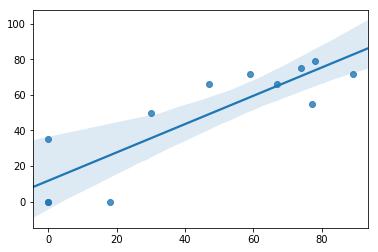

In [38]:
sns.regplot(X_train.reshape(1,12)[0], 
            y_train.reshape(1,12)[0])
plt.show()